<a href="https://colab.research.google.com/github/LeoVogiatzis/medical_data_analysis/blob/main/class_imbalance_(v0_2_thyroid).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
 
dt = pd.read_csv("medical_data/Thyroid_Sick.csv")
dt.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [4]:
dt.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [5]:
dt['Class'].value_counts()

negative    3541
sick         231
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


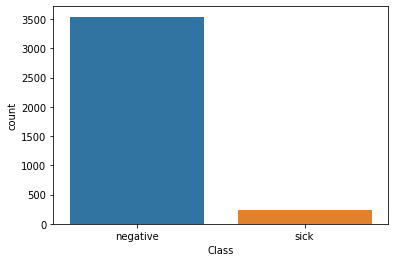

In [6]:
sns.countplot(dt['Class'])

In [7]:
print(dt.isnull().sum())

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
Class         

In [8]:
dt.drop(["TBG", "referral source"], axis=1, inplace=True)
dt = dt.loc[:, ~dt.columns.str.endswith("measured")]
dt.dropna(subset=['sex'], inplace=True)

dt = dt.replace(["f", "t"], [0, 1])
dt = dt.replace(["F", "M"], [0, 1])
dt = dt.replace(["negative", "sick"], [0, 1])

print(dt.shape)

(3622, 22)


In [ ]:
plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(dt.corr(), annot = True, linewidths=.5)
plt.title('Correlation Between Features', fontsize = 30)
plt.show()

In [ ]:
X = dt.drop(columns=['Class'])
y = dt['Class']

X.head()

In [33]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [35]:
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from imblearn.under_sampling import TomekLinks
from numpy import mean, empty, array
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [36]:
#@title Random Forest Classifier w/o SMOTE
clf_rf = RandomForestClassifier(n_estimators=10, random_state=42)

mdl_rf = clf_rf.fit(x_train, y_train)
y_rf_pred = mdl_rf.predict(x_test)

target_names = ['negative', 'sick']
cl_report_rf = classification_report(y_test, y_rf_pred, target_names=target_names, digits=4, output_dict=True)

In [ ]:
#@title Random Forest Classifier w/ SMOTE
smote = SMOTE(random_state=115, k_neighbors=10)

x_srf_train, y_srf_train = smote.fit_resample(x_train, y_train)
x_srf_test, y_srf_test = smote.fit_resample(x_test, y_test)

clf_srf = RandomForestClassifier(n_estimators=10, random_state=42)

mdl_srf = clf_srf.fit(x_srf_train, y_srf_train)
y_srf_pred = mdl_srf.predict(x_srf_test)

target_names = ['negative', 'sick']
cl_report_srf = classification_report(y_srf_test, y_srf_pred, target_names=target_names, digits=4, output_dict=True)

In [ ]:
#@title Random Forest Classifier w/ Borderline SMOTE
bsmote = BorderlineSMOTE(random_state=115, k_neighbors=10)

x_sbrf_train, y_sbrf_train = bsmote.fit_resample(x_train, y_train)
x_sbrf_test, y_sbrf_test = bsmote.fit_resample(x_test, y_test)

clf_sbrf = RandomForestClassifier(n_estimators=10, random_state=42)

mdl_sbrf = clf_sbrf.fit(x_sbrf_train, y_sbrf_train)
y_sbrf_pred = mdl_sbrf.predict(x_sbrf_test)

target_names = ['negative', 'sick']
cl_report_sbrf = classification_report(y_sbrf_test, y_sbrf_pred, target_names=target_names, digits=4, output_dict=True)

In [ ]:
#@title Random Forest Classifier w/ SMOTE + Tomek Links Removal
smote = SMOTE(random_state=115, k_neighbors=10)
tomek = TomekLinks(random_state=232)

x_strf_train, y_strf_train = smote.fit_resample(x_train, y_train)
x_strf_test, y_strf_test = smote.fit_resample(x_test, y_test)

x_strf_train, y_strf_train = tomek.fit_sample(x_strf_train, y_strf_train)
x_strf_test, y_strf_test = tomek.fit_sample(x_strf_test, y_strf_test)

clf_strf = RandomForestClassifier(n_estimators=10, random_state=42)

mdl_strf = clf_strf.fit(x_strf_train, y_strf_train)
y_strf_pred = mdl_strf.predict(x_strf_test)

target_names = ['negative', 'sick']
cl_report_strf = classification_report(y_strf_test, y_strf_pred, target_names=target_names, digits=4, output_dict=True)

In [40]:
#@title Decision Tree Classifier w/o SMOTE
clf_dt = DecisionTreeClassifier(random_state=42)

mdl_dt = clf_dt.fit(x_train, y_train)
y_dt_pred = mdl_dt.predict(x_test)

target_names = ['negative', 'sick']
cl_report_dt = classification_report(y_test, y_dt_pred, target_names=target_names, digits=4, output_dict=True)

In [ ]:
#@title Decision Tree Classifier w/ SMOTE
smote = SMOTE(random_state=115, k_neighbors=10)

x_sdt_train, y_sdt_train = smote.fit_resample(x_train, y_train)
x_sdt_test, y_sdt_test = smote.fit_resample(x_test, y_test)

clf_sdt = DecisionTreeClassifier(random_state=42)

mdl_sdt = clf_sdt.fit(x_sdt_train, y_sdt_train)
y_sdt_pred = mdl_sdt.predict(x_sdt_test)

target_names = ['negative', 'sick']
cl_report_sdt = classification_report(y_sdt_test, y_sdt_pred, target_names=target_names, digits=4, output_dict=True)

In [ ]:
#@title Decision Tree Classifier w/ Borderline SMOTE
bsmote = BorderlineSMOTE(random_state=115, k_neighbors=10)

x_sbdt_train, y_sbdt_train = bsmote.fit_resample(x_train, y_train)
x_sbdt_test, y_sbdt_test = bsmote.fit_resample(x_test, y_test)

clf_sbdt = DecisionTreeClassifier(random_state=42)

mdl_sbdt = clf_sbdt.fit(x_sbdt_train, y_sbdt_train)
y_sbdt_pred = mdl_sbdt.predict(x_sbdt_test)

target_names = ['negative', 'sick']
cl_report_sbdt = classification_report(y_sbdt_test, y_sbdt_pred, target_names=target_names, digits=4, output_dict=True)

In [ ]:
#@title Decision Tree Classifier w/ SMOTE + Tomek Links Removal
smote = SMOTE(random_state=115, k_neighbors=10)
tomek = TomekLinks(random_state=232)

x_stdt_train, y_stdt_train = smote.fit_resample(x_train, y_train)
x_stdt_test, y_stdt_test = smote.fit_resample(x_test, y_test)

x_stdt_train, y_stdt_train = tomek.fit_sample(x_stdt_train, y_stdt_train)
x_stdt_test, y_stdt_test = tomek.fit_sample(x_stdt_test, y_stdt_test)

clf_stdt = DecisionTreeClassifier(random_state=42)

mdl_stdt = clf_stdt.fit(x_stdt_train, y_stdt_train)
y_stdt_pred = mdl_stdt.predict(x_stdt_test)

target_names = ['negative', 'sick']
cl_report_stdt = classification_report(y_stdt_test, y_stdt_pred, target_names=target_names, digits=4, output_dict=True)

In [45]:
#@title AdaBoost Classifier w/o SMOTE
clf_ab = AdaBoostClassifier(n_estimators=25, random_state=343)

mdl_ab = clf_ab.fit(x_train, y_train)
y_ab_pred = mdl_ab.predict(x_test)

target_names = ['negative', 'sick']
cl_report_ab = classification_report(y_test, y_ab_pred, target_names=target_names, digits=4, output_dict=True)

In [ ]:
#@title AdaBoost Classifier w/ SMOTE
smote = SMOTE(random_state=115, k_neighbors=10)

x_sab_train, y_sab_train = smote.fit_resample(x_train, y_train)
x_sab_test, y_sab_test = smote.fit_resample(x_test, y_test)

clf_sab = AdaBoostClassifier(n_estimators=25, random_state=343)

mdl_sab = clf_sab.fit(x_sab_train, y_sab_train)
y_sab_pred = mdl_sab.predict(x_sab_test)

target_names = ['negative', 'sick']
cl_report_sab = classification_report(y_sab_test, y_sab_pred, target_names=target_names, digits=4, output_dict=True)

In [ ]:
#@title AdaBoost Classifier w/ Borderline SMOTE
bsmote = BorderlineSMOTE(random_state=115, k_neighbors=10)

x_sbab_train, y_sbab_train = bsmote.fit_resample(x_train, y_train)
x_sbab_test, y_sbab_test = bsmote.fit_resample(x_test, y_test)

clf_sbab = AdaBoostClassifier(n_estimators=25, random_state=343)

mdl_sbab = clf_sbab.fit(x_sbab_train, y_sbab_train)
y_sbab_pred = mdl_sbab.predict(x_sbab_test)

target_names = ['negative', 'sick']
cl_report_sbab = classification_report(y_sbab_test, y_sbab_pred, target_names=target_names, digits=4, output_dict=True)

In [ ]:
#@title AdaBoost Classifier w/ SMOTE + Tomek Links Removal
smote = SMOTE(random_state=115, k_neighbors=10)
tomek = TomekLinks(random_state=232)

x_stab_train, y_stab_train = smote.fit_resample(x_train, y_train)
x_stab_test, y_stab_test = smote.fit_resample(x_test, y_test)

x_stab_train, y_stab_train = tomek.fit_sample(x_stab_train, y_stab_train)
x_stab_test, y_stab_test = tomek.fit_sample(x_stab_test, y_stab_test)

clf_stab = AdaBoostClassifier(n_estimators=25, random_state=343)

mdl_stab = clf_stab.fit(x_stab_train, y_stab_train)
y_stab_pred = mdl_stab.predict(x_stab_test)

target_names = ['negative', 'sick']
cl_report_stab = classification_report(y_stab_test, y_stab_pred, target_names=target_names, digits=4, output_dict=True)

In [26]:
#@title Easy Ensemble Classifier on whole dataset

# IS RUN FOR MUCH TIME
scores = empty(shape=(4,), dtype='object')
for counter in range(0,4):
  clf_eec = EasyEnsembleClassifier(n_estimators=5*(counter+1), random_state=115)

  imputer = KNNImputer(n_neighbors=5, weights="uniform")
  x_fit = imputer.fit_transform(X)

  scaler = StandardScaler()
  x_fit = scaler.fit_transform(x_fit)

  pca = PCA(n_components=10)
  x_fit = pca.fit_transform(x_fit)

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=115)
  scores0 = mean(cross_val_score(clf_eec, x_fit, y, scoring='accuracy', cv=cv, n_jobs=-1))
  scores1 = mean(cross_val_score(clf_eec, x_fit, y, scoring='precision', cv=cv, n_jobs=-1))
  scores2 = mean(cross_val_score(clf_eec, x_fit, y, scoring='recall', cv=cv, n_jobs=-1))
  scores3 = mean(cross_val_score(clf_eec, x_fit, y, scoring='f1', cv=cv, n_jobs=-1))
  scores[counter] = [scores0, scores1, scores2, scores3]

In [49]:
#@title Classifiers with class imbalance cost-sensitive matrix
clf_csrf = RandomForestClassifier(n_estimators=10, random_state=42, class_weight="balanced_subsample")

mdl_csrf = clf_csrf.fit(x_train, y_train)
y_csrf_pred = mdl_csrf.predict(x_test)

target_names = ['negative', 'sick']
cl_report_csrf = classification_report(y_test, y_csrf_pred, target_names=target_names, digits=4, output_dict=True)

clf_csdt = DecisionTreeClassifier(random_state=42, class_weight="balanced")

mdl_csdt = clf_csdt.fit(x_train, y_train)
y_csdt_pred = mdl_csdt.predict(x_test)

target_names = ['negative', 'sick']
cl_report_csdt = classification_report(y_test, y_csdt_pred, target_names=target_names, digits=4, output_dict=True)
#this is dummy#
cl_report_csab = classification_report(y_test, y_csdt_pred, target_names=target_names, digits=4, output_dict=True)

In [ ]:
# results from random forest classifier
print(cl_report_rf)      # clean results
print(cl_report_srf)     # results with smote
print(cl_report_sbrf)    # results with borderline smote
print(cl_report_strf)    # results with smote after removing tomek links
print(cl_report_csrf)    # results with application of cost-sensitive weight balancing
# results from decision tree classifier
print(cl_report_dt)      # clean results
print(cl_report_sdt)     # results with smote
print(cl_report_sbdt)    # results with borderline smote
print(cl_report_stdt)    # results with smote after removing tomek links
print(cl_report_csdt)    # results with application of cost-sensitive weight balancing
# results from adaboost classifier
print(cl_report_ab)      # clean results
print(cl_report_sab)     # results with smote
print(cl_report_sbab)    # results with borderline smote
print(cl_report_stab)    # results with smote after removing tomek links
# result of EasyEnsembleClassifier
print(scores)

In [ ]:
k = 0

for algorithm in ['rf', 'dt', 'ab']:
  for metr in ['precision', 'recall', 'f1-score']:
    globals()[f"{algorithm}_{metr.replace('-', '_')}"] = empty(shape=(5,2), dtype='object')
    for label in ['negative', 'sick']:
      for mode in ['', 's', 'sb', 'st', 'cs']:
        val = globals()[f"cl_report_{mode}{algorithm}"].get(label).get(metr)
        row = k % 10 // 5
        col = k % 5
        globals()[f"{algorithm}_{metr.replace('-','_')}"][col][row] = val
        k = k + 1
    #print(globals()[f"{algorithm}_{metr}"])

# print(rf_precision)
# print(rf_recall)
# print(rf_f1_score)
# print(dt_precision)
# print(dt_recall)
# print(dt_f1_score)

# for each array, they are as follows:
# columns represent classes (negative, sick)
# columns represent SMOTE mode used (None, Simple SMOTE, Borderline SMOTE, SMOTE + Tomek Links Removal)

# as for perkele ensemble classifier, is shit

In [ ]:
#@title Plotting cell for SMOTE. Needs changing array names.
n_groups = 2
fig, ax = plt.subplots(figsize=(9,7.2))
index = np.arange(n_groups)
bar_width = 0.12
opacity = 1

rects1 = plt.bar(index, dt_f1_score[0], bar_width,
label='No preprocessing')
rects2 = plt.bar(index+bar_width, dt_f1_score[1], bar_width,
label='SMOTE')
rects3 = plt.bar(index+bar_width*2, dt_f1_score[2], bar_width,
label='Borderline SMOTE')
rects4 = plt.bar(index+bar_width*3, dt_f1_score[3], bar_width,
label='SMOTE + Tomek removal')

plt.xlabel('Class')
plt.ylabel('Metric Score')
plt.title('F1 Score by class and preprocessing for Random Forest Classifier')
plt.xticks(index + 1.5*bar_width, ('Negative', 'Sick'))
plt.legend()

for rects in [rects1, rects2, rects3, rects4]:
  for p in rects:
    height = p.get_height()
    ax.annotate('{}'.format(round(height, 4)),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3), # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
#@title Plotting cell for cost-sensitive... Needs changing array names.
n_groups = 2
fig, ax = plt.subplots(figsize=(9,7.2))
index = np.arange(n_groups)
bar_width = 0.12
opacity = 1

rects1 = plt.bar(index, dt_precision[0], bar_width,
label='Without balancing')
rects2 = plt.bar(index+bar_width, dt_precision[4], bar_width,
label='With balancing')

plt.xlabel('Class')
plt.ylabel('Metric Score')
plt.title('Precision by class and preprocessing for Decision Tree on balancing')
plt.xticks(index + 0.5*bar_width, ('Negative', 'Sick'))
plt.legend()

for rects in [rects1, rects2]:
  for p in rects:
    height = p.get_height()
    ax.annotate('{}'.format(round(height, 4)),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3), # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
#length = max(map(len, scores))
#scores=array([xi+[None]*(length-len(xi)) for xi in scores])
print(scores.T)

In [ ]:
#@title Plotting cell for EasyEnsemble.
n_groups = 2
fig, ax = plt.subplots(figsize=(9,7.2))
index = np.arange(n_groups)

labels = ['Accuracy','Precision','Recall','F1 Score']

points1 = plt.plot([5,10,15,20], scores.T[0], color='red', marker='o')
points2 = plt.plot([5,10,15,20], scores.T[1], color='darkgreen', marker='o')
points3 = plt.plot([5,10,15,20], scores.T[2], color='blue', marker='o')
points4 = plt.plot([5,10,15,20], scores.T[3], color='orange', marker='o')
plt.legend(labels)
plt.title('Easy Ensemble Classifier Metrics', fontsize=14)
plt.xlabel('Number of Estimators', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.xticks([5,10,15,20]) # Redefining x-axis labels
plt.grid(True)


for p in points1:
  height = p.get_ydata()
  width = p.get_xdata()
  for i in range(0,4):
    ax.text(width[i], height[i]-0.02, "%.4f" %(round(height[i], 4)), ha="center")

for points in [points2, points3, points4]:
  for p in points:
    height = p.get_ydata()
    width = p.get_xdata()
    for i in range(0,4):
      ax.text(width[i], height[i]+0.01, "%.4f" %round(height[i], 4), ha="center")

plt.show()